# Tieteellinen laskenta, 11.11.22, Demot 3
##### Johannes Rajala

In [48]:
import numpy as np
import cmath as cm
from math import pi, cos, sin
import random
import matplotlib.pyplot as plt
import scipy
from decimal import Decimal
import itertools

### Tehtävä 1

In [17]:
polynomit = [] # Luodaan tyhjä lista polynomeja varten
n = 10 # Generoidaan 10 polynomia
for i in range(n):
    polynomi = [random.uniform(-10,10), random.uniform(-10,10), random.uniform(-10,10)] # Generoidaan 3 lukua väliltä [-10,10] jotka muodostavat polynomin ax^2 + bx + c 
    polynomit.append(polynomi)

In [18]:
polynomit # luodut polynomit

[[-7.9753491382001895, -1.9903400469742039, 1.5671454223096397],
 [-5.5341735909281216, 0.6207693200689928, -0.8481333948449947],
 [2.6410703859805924, 4.179863422941185, 2.516958171896979],
 [0.5961699906026947, 9.956327576351256, -1.101704077551485],
 [2.229959081985271, -8.611627273977495, -3.1402793251545162],
 [-6.275028440902477, -0.035227273975840134, 7.777845084791984],
 [6.479809181930651, 3.461799637403244, 5.6228460126001885],
 [2.6030570405269504, -7.042032200206457, -5.002939560650617],
 [-7.391902274569013, -7.415096313884901, -7.426904787176706],
 [1.8645445172163395, 9.657785019283164, 0.9755108372638599]]

In [42]:
juuret = [np.roots(polynomi) for polynomi in polynomit] # polynomien juuret
juuret

[array([-0.58529013,  0.33572864]),
 array([0.0560851+0.38743814j, 0.0560851-0.38743814j]),
 array([-0.79131996+0.57168136j, -0.79131996-0.57168136j]),
 array([-16.81041436,   0.10993005]),
 array([ 4.19729441, -0.33550728]),
 array([-1.11613505,  1.11052117]),
 array([-0.26712204+0.89240939j, -0.26712204-0.89240939j]),
 array([ 3.28955139, -0.58425831]),
 array([-0.50156888+0.86785016j, -0.50156888-0.86785016j]),
 array([-5.07664381, -0.10305822])]

In [46]:
f = open("juuret.txt", "a")
for juuri in juuret:
    arvo_1 = str(juuri[0])
    f.write(arvo_1)
    arvo_2 = str(juuri[1])
    f.write(arvo_2)
f.close()

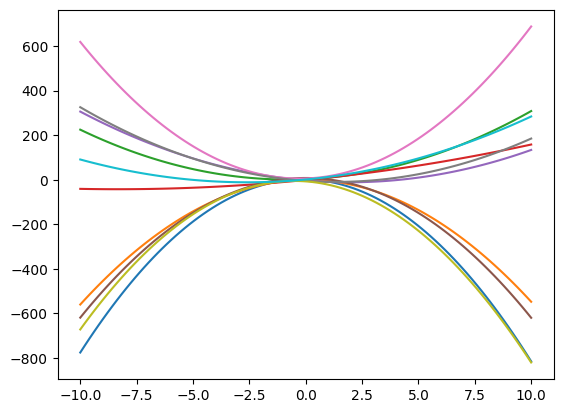

In [55]:
lower_limit = -10
upper_limit = 10
num_pts = 100
x = np.linspace(lower_limit, upper_limit, num_pts)

values = []
for polynomi in polynomit:
    values.append(np.polyval(polynomi, x))

for value in values:
    plt.plot(x, value)

### Tehtävä 2
#### a)

![alt text](integraali.png "Integraali")

#### b)

In [43]:
def doubleint0(x1, x2, y1, y2, m, n, func, tarkka):
    a=x1
    b=x2
    s=0
    for i in range(m):
        x = a+i*(b-a)/n
        for j in range(n):
            dy = (y2-y1)/n
            y = y1+j*dy
            s = s+func(x,y)*dy*(b-a)/m
    
    kymmenpotenssimuoto = "{:.2E}".format(Decimal(np.abs(s-tarkka))) 
    return f"Kun m={m} ja n={n}, Integraalin estimaatti={s} ja virhe={kymmenpotenssimuoto}"
    

In [44]:
for m in [10,20,90]:
    for n in [10,20,90]:
        print(doubleint0(0,3,0,2,m,n, lambda x,y: x*y, 9))

Kun m=10 ja n=10, Integraalin estimaatti=7.29 ja virhe=1.71E+0
Kun m=10 ja n=20, Integraalin estimaatti=3.847500000000001 ja virhe=5.15E+0
Kun m=10 ja n=90, Integraalin estimaatti=0.8900000000000005 ja virhe=8.11E+0
Kun m=20 ja n=10, Integraalin estimaatti=15.390000000000008 ja virhe=6.39E+0
Kun m=20 ja n=20, Integraalin estimaatti=8.122500000000004 ja virhe=8.77E-1
Kun m=20 ja n=90, Integraalin estimaatti=1.8788888888888893 ja virhe=7.12E+0
Kun m=90 ja n=10, Integraalin estimaatti=72.09000000000005 ja virhe=6.31E+1
Kun m=90 ja n=20, Integraalin estimaatti=38.04749999999997 ja virhe=2.90E+1
Kun m=90 ja n=90, Integraalin estimaatti=8.801111111111098 ja virhe=1.99E-1


### Tehtävä 3
#### a)

In [92]:
def matriisit(n):
    matriisi = [] # Luodaan tyhjä lista matriisia varten
    for i in range(n):
        rivi = []
        for j in range(n):
            rivi.append(random.uniform(-10,10))
        matriisi.append(rivi)
    return f"{n}x{n} Matriisi:",matriisi,"ja sen ominaisarvot:", np.linalg.eig(matriisi)[0]

In [114]:
matriisit(3)

('3x3 Matriisi:',
 [[-1.8042997066464643, 5.324851409075293, 6.840867127811155],
  [-4.015671649405186, -8.42863375591726, 2.9761744914175488],
  [-8.751505465230803, -5.216858285462791, 0.22133164195433608]],
 'ja sen ominaisarvot:',
 array([-1.97521933+9.04843557j, -1.97521933-9.04843557j,
        -6.06116316+0.j        ]))

In [105]:
matrix = np.round(matriisit(18)[1],3)
print("18x18 matriisi:",'\n', '\n'.join(['\t'.join([str(cell) for cell in row]) for row in matrix]))
print("ja sen ominaisarvot:",'\n',matrix[3])

18x18 matriisi: 
 -0.531	-5.482	-2.375	8.687	-1.222	6.778	8.91	-7.372	-6.993	-6.134	8.106	3.885	0.826	8.152	-3.633	-9.698	4.873	-5.598
-5.0	-2.579	-2.635	-5.862	-4.231	5.065	-1.428	-1.62	8.048	2.965	-7.573	-6.613	-2.246	-4.05	9.797	-9.709	4.613	-4.913
-8.307	-2.449	2.788	9.587	-2.083	-4.59	-1.639	2.646	1.958	-0.618	4.52	2.732	-6.692	7.593	8.239	-1.536	-6.168	2.886
-3.171	-5.242	-7.578	7.742	3.364	4.413	-3.731	2.041	-4.319	1.694	-0.392	0.688	-2.89	4.35	-3.318	2.253	5.595	-1.891
-0.407	-4.333	3.88	-9.14	-2.891	-8.157	9.458	7.945	-5.653	4.646	-7.006	-7.755	-7.228	-0.596	5.707	8.898	-3.583	-5.743
-4.027	5.381	0.33	6.027	2.867	-7.714	-9.873	4.037	7.132	3.883	6.851	7.209	-2.581	-6.86	-2.709	8.522	3.212	-8.378
5.408	0.975	1.41	-9.087	8.358	-4.008	5.912	-7.433	3.49	-5.811	-4.069	8.23	-0.457	-3.263	7.68	-4.514	5.276	-8.252
-3.197	9.381	6.887	9.496	-5.866	-3.174	2.935	4.907	-0.191	1.854	-2.978	6.165	0.697	-5.344	3.043	5.142	-1.187	-1.188
8.885	3.131	9.479	-5.921	8.926	-2.557	-4.344	-4.664	5.288	

#### b)

Text(0.5, 1.0, 'Gershgorin disks and eigenvalues $x + iy$')

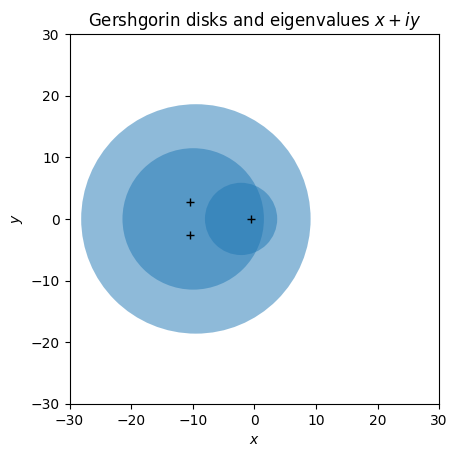

In [118]:
N = 3 # dimension of our square matrix

M = np.array(matriisit(N)[1])

R = np.zeros(N) # disk radii
for i in range(N):
    R[i] = sum(abs(M[i,:])) - abs(M[i,i])

eigenvalues = np.linalg.eigvals(M)

# Plotting code
fig, ax = plt.subplots()
for k in range(N):
    x, y = M[k,k].real, M[k,k].imag
    ax.add_artist( plt.Circle((x, y), R[k], alpha=0.5) )
    plt.plot(eigenvalues[k].real, eigenvalues[k].imag, 'k+')

ax.axis([-30, 30, -30, 30])
ax.set_aspect(1)    
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Gershgorin disks and eigenvalues $x + iy$")

Text(0.5, 1.0, 'Gershgorin disks and eigenvalues $x + iy$')

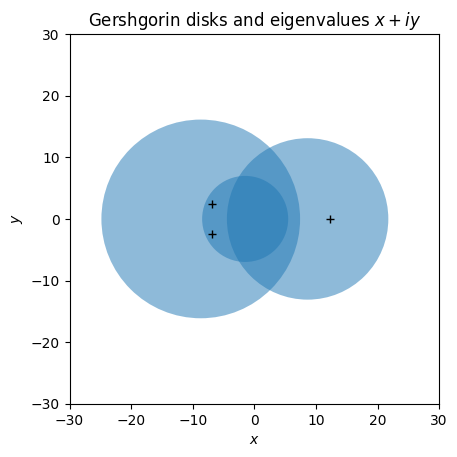

In [120]:
N = 3 # dimension of our square matrix

M = np.array(matriisit(N)[1])

R = np.zeros(N) # disk radii
for i in range(N):
    R[i] = sum(abs(M[i,:])) - abs(M[i,i])

eigenvalues = np.linalg.eigvals(M)

# Plotting code
fig, ax = plt.subplots()
for k in range(N):
    x, y = M[k,k].real, M[k,k].imag
    ax.add_artist( plt.Circle((x, y), R[k], alpha=0.5) )
    plt.plot(eigenvalues[k].real, eigenvalues[k].imag, 'k+')

ax.axis([-30, 30, -30, 30])
ax.set_aspect(1)    
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Gershgorin disks and eigenvalues $x + iy$")

Text(0.5, 1.0, 'Gershgorin disks and eigenvalues $x + iy$')

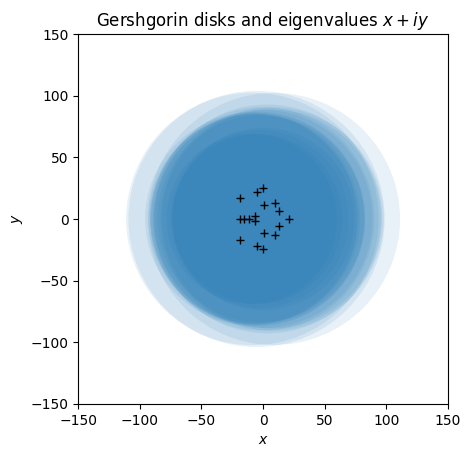

In [125]:
N = 18 # dimension of our square matrix

M = np.array(matriisit(N)[1])

R = np.zeros(N) # disk radii
for i in range(N):
    R[i] = sum(abs(M[i,:])) - abs(M[i,i])

eigenvalues = np.linalg.eigvals(M)

# Plotting code
fig, ax = plt.subplots()
for k in range(N):
    x, y = M[k,k].real, M[k,k].imag
    ax.add_artist( plt.Circle((x, y), R[k], alpha=0.1) )
    plt.plot(eigenvalues[k].real, eigenvalues[k].imag, 'k+')

ax.axis([-150, 150, -150, 150])
ax.set_aspect(1)    
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Gershgorin disks and eigenvalues $x + iy$")

### Tehtävä 4
#### a)

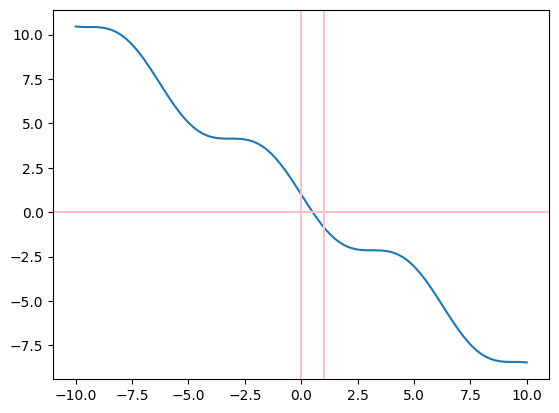

In [144]:
lower_limit = -10
upper_limit = 10
num_pts = 100
x = np.linspace(lower_limit, upper_limit, num_pts)

values = []
for point in x:
    values.append(1-point-np.sin(point))


plt.plot(x, values)
plt.axhline(0, color = "pink")
plt.axvline(0, color = "pink")
plt.axvline(1, color = "pink")

Nollakohta vaikuttaisi olevan noin puolikkaan paikkeilla. Intervalli [0,1] sisältää nollakohdan.

#### b)

![alt text](lambda.png "Lambda")

### c)

In [149]:
def juuri(func, aloitus):
    for i in range(10000):
        y = func(aloitus)
        aloitus = y
    return y

In [150]:
juuri(lambda x: (x+ (1-x-np.sin(x)/2.5)), 0.5)

0.7325060166117269